# 数据挖掘实战第八期
## Task1
### 任务2
- 特征衍生
- 特征挑选：分别用IV值和随机森林等进行特征选择
- ……以及你能想到特征工程处理

In [150]:
# 读取文档
import pandas as pd
data_clean = pd.read_csv('data_clean.csv', encoding = 'gbk')

In [151]:
data_clean.shape

(4455, 81)

In [110]:
correction = abs(data_clean.corr())
correction

,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,trans_days_interval,regiol_mobility,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
low_volume_percent,1.000000,0.158162,0.065108,0.005373,0.024970,0.090662,0.093389,0.050987,0.061210,0.043221,...,0.140173,0.128145,0.083987,0.032534,0.074851,0.067226,0.096647,0.094627,0.066194,0.047500
middle_volume_percent,0.158162,1.000000,0.135119,0.001570,0.032681,0.060951,0.098683,0.014392,0.005179,0.009211,...,0.145599,0.110230,0.153241,0.003266,0.007761,0.014847,0.169575,0.174126,0.001418,0.003253
take_amount_in_later_12_month_highest,0.065108,0.135119,1.000000,0.007085,0.059015,0.109473,0.180722,0.053501,0.053263,0.025455,...,0.071822,0.038749,0.039292,0.015864,0.021483,0.021421,0.054442,0.040603,0.001547,0.010130
trans_amount_increase_rate_lately,0.005373,0.001570,0.007085,1.000000,0.016061,0.003233,0.012137,0.013638,0.000578,0.027819,...,0.007116,0.000119,0.028866,0.006174,0.019898,0.019599,0.007122,0.040863,0.001467,0.027218
trans_activity_month,0.024970,0.032681,0.059015,0.016061,1.000000,0.062979,0.071640,0.090509,0.153963,0.219952,...,0.061847,0.037275,0.036822,0.000400,0.003332,0.005534,0.022388,0.043764,0.024595,0.014880
trans_activity_day,0.090662,0.060951,0.109473,0.003233,0.062979,1.000000,0.670210,0.489062,0.540460,0.140510,...,0.445155,0.202242,0.096622,0.181157,0.553486,0.551140,0.224509,0.085255,0.186346,0.299110
transd_mcc,0.093389,0.098683,0.180722,0.012137,0.071640,0.670210,1.000000,0.403648,0.445083,0.111441,...,0.313715,0.165959,0.066250,0.131905,0.371197,0.374660,0.156951,0.057663,0.117972,0.211593
trans_days_interval_filter,0.050987,0.014392,0.053501,0.013638,0.090509,0.489062,0.403648,1.000000,0.683296,0.124590,...,0.222778,0.118331,0.055196,0.142220,0.286901,0.286036,0.111327,0.045793,0.064630,0.163245
trans_days_interval,0.061210,0.005179,0.053263,0.000578,0.153963,0.540460,0.445083,0.683296,1.000000,0.139334,...,0.271875,0.163049,0.034716,0.102588,0.285654,0.286510,0.105000,0.024740,0.100535,0.178628
regiol_mobility,0.043221,0.009211,0.025455,0.027819,0.219952,0.140510,0.111441,0.124590,0.139334,1.000000,...,0.099696,0.062712,0.092796,0.054084,0.147120,0.145322,0.091150,0.079245,0.051750,0.107139


<Figure size 432x288 with 0 Axes>

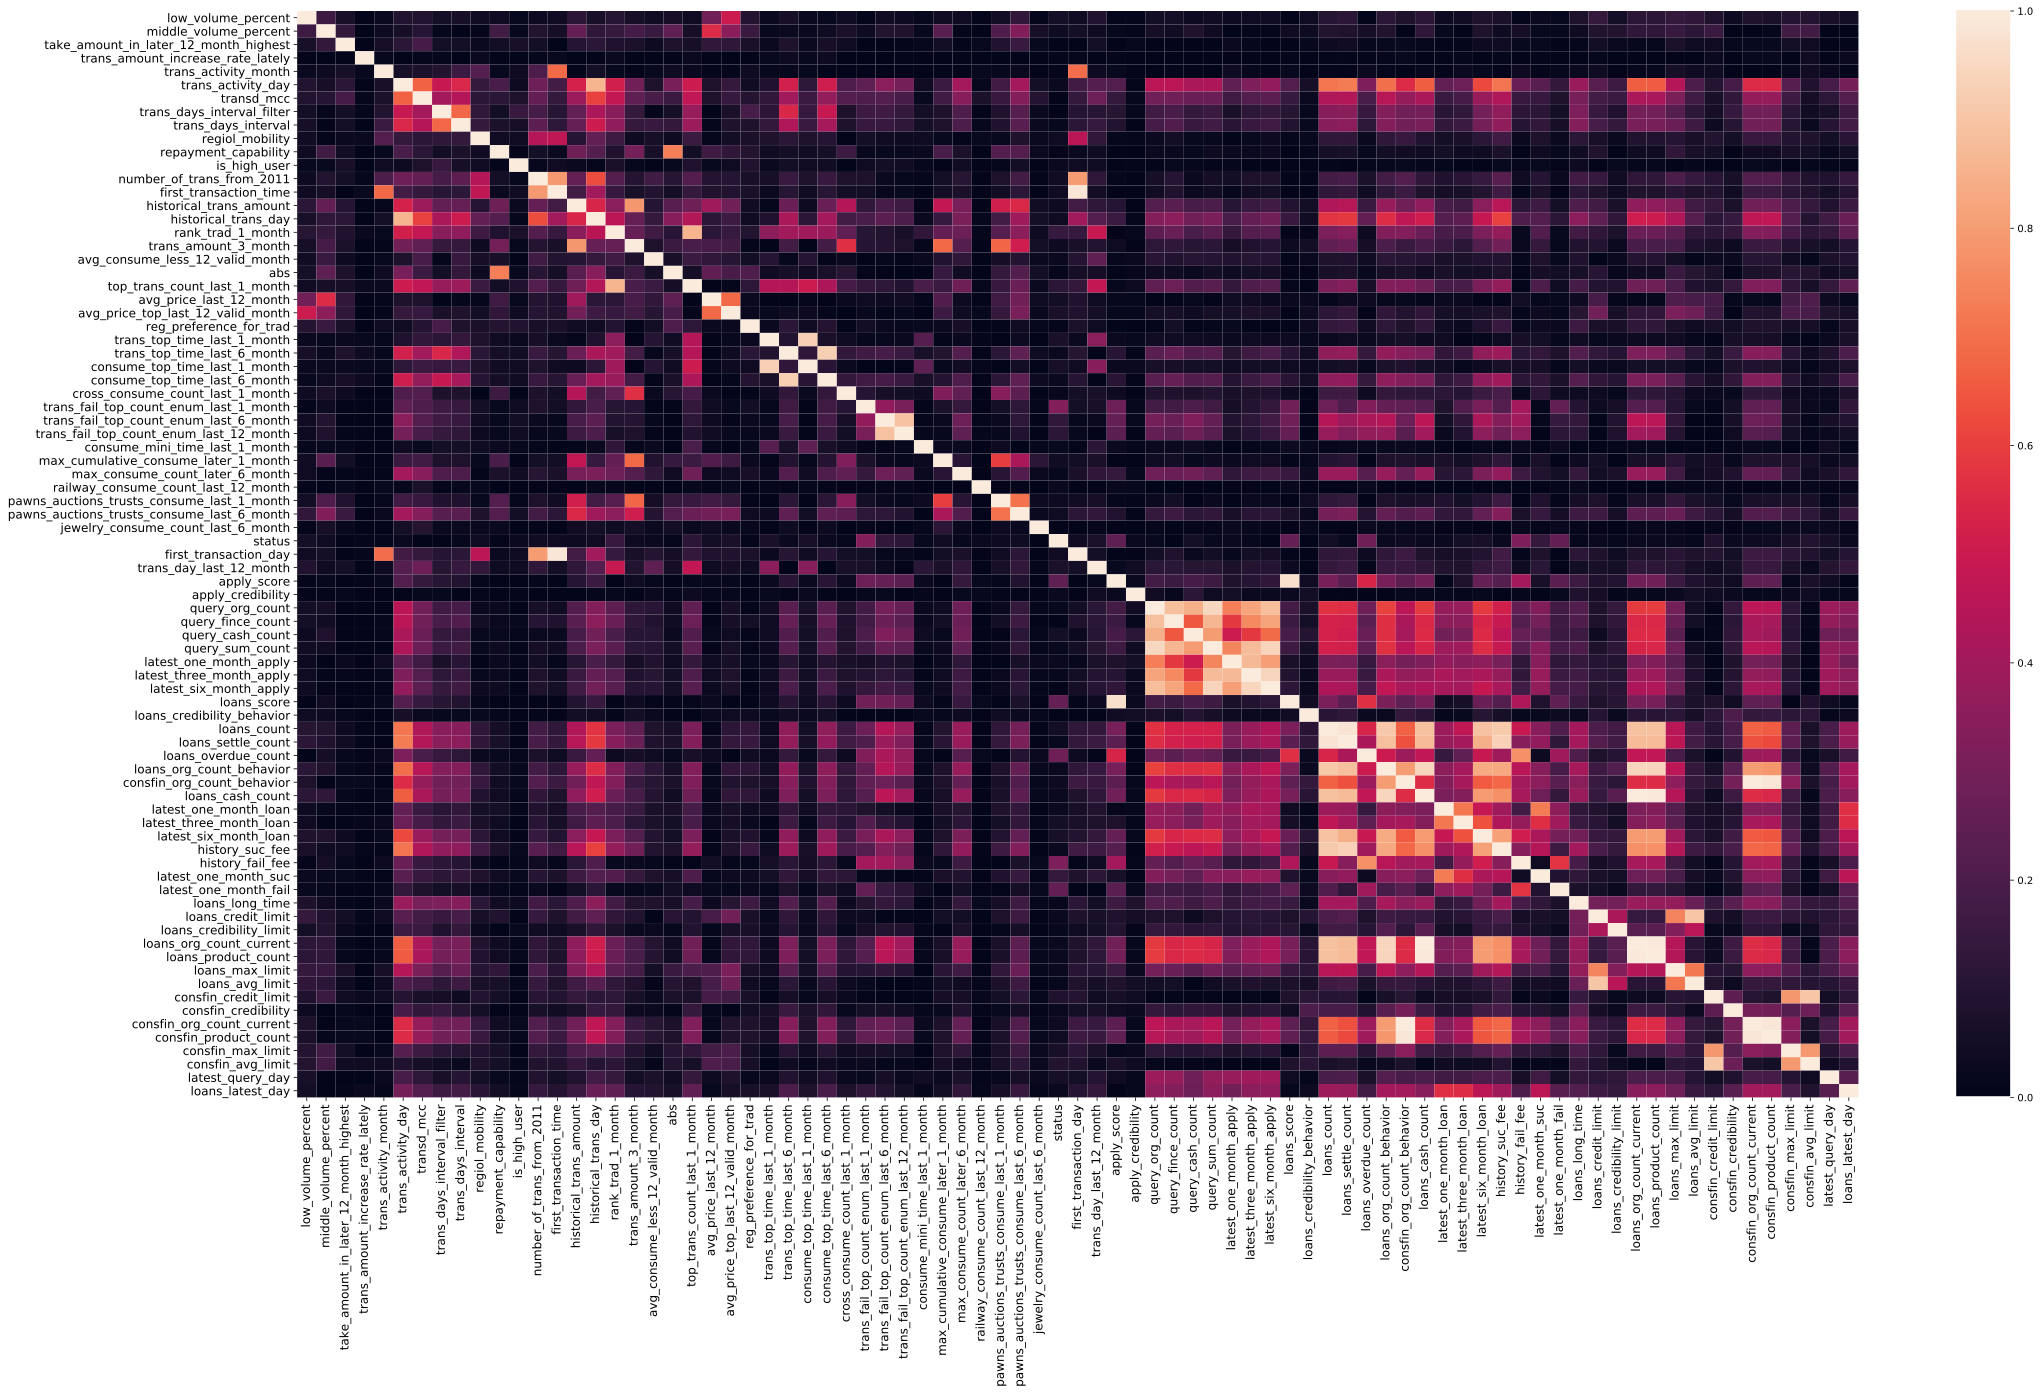

In [107]:
# 可视化展示相关性矩阵
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 矢量图
fig = plt.figure() 
plt.figure(figsize=(35, 20))
# ax = sns.heatmap(correction,cmap=plt.cm.Greys, linewidths=0.05,vmax=1, vmin=0 ,annot=True,annot_kws={'size':6,'weight':'bold'})
# xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
sns.heatmap(correction)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('correction.jpg')
plt.show()

- 数据归一化、标准化

In [111]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler
# 归一化
X_min_max = MinMaxScaler().fit_transform(data_clean)
# 标准化
X_std = StandardScaler().fit_transform(data_clean)

x_temp = np.array(data_clean)
status = data_clean['status']
y_temp = np.array(status)

# 切分
def split(x,y,test_ratic=0.2,seed=None):
    assert x.shape[0]==y.shape[0]
    assert 0.0<=test_ratic <=1.0

    if seed:
        np.random.seed(seed)
    shuffle_index = np.random.permutation(len(x))  ##乱序排列
    test_size = int(len(x) * test_ratic)
    test_index = shuffle_index[:test_size]
    train_index = shuffle_index[test_size:]

    x_train = x[train_index]
    y_train = y[train_index]

    x_test = x[test_index]
    y_test = y[test_index]

    return x_train,y_train,x_test,y_test

x_train,y_train,x_test,y_test = split(x_temp, y_temp,test_ratic=0.3)
print(x_train,y_train,x_test,y_test)

[[ 4.000e-02  9.600e-01  1.000e+02 ...  6.440e+03  5.000e+00  3.300e+01]
 [ 2.000e-02  9.800e-01  1.000e+02 ...  4.533e+03  2.000e+01  1.160e+02]
 [ 3.000e-02  9.700e-01  5.000e+02 ...  4.500e+03 -2.000e+00  5.300e+01]
 ...
 [ 1.000e-02  9.900e-01  0.000e+00 ...  1.305e+04  2.540e+02  5.300e+01]
 [ 2.000e-02  9.800e-01  9.000e+02 ...  3.850e+03  4.400e+01  1.520e+02]
 [ 2.000e-02  9.700e-01  1.500e+03 ...  4.750e+03  1.000e+00  1.800e+01]] [0 0 0 ... 0 0 0] [[2.000e-02 6.800e-01 1.000e+03 ... 8.300e+03 1.700e+01 1.450e+02]
 [1.000e-02 8.900e-01 4.000e+03 ... 0.000e+00 1.600e+01 1.930e+02]
 [2.000e-02 8.600e-01 3.100e+03 ... 1.200e+03 1.400e+01 1.400e+01]
 ...
 [3.000e-02 9.700e-01 0.000e+00 ... 2.233e+03 3.500e+02 6.300e+01]
 [1.000e-02 8.900e-01 1.000e+02 ... 3.800e+03 8.000e+00 4.300e+01]
 [2.000e-02 9.800e-01 2.000e+03 ... 1.800e+04 1.000e+00 2.400e+01]] [0 1 1 ... 0 0 0]


- 计算iv值

In [123]:
import numpy as np
def CalcIV(Xvar,Yvar):
    N_0=np.sum(Yvar==0)
    N_1=np.sum(Yvar==1)
    N_0_group=np.zeros(np.unique(Xvar).shape)
    N_1_group=np.zeros(np.unique(Xvar).shape)
    for i in range(len(np.unique(Xvar))):
        N_0_group[i] = Yvar[(Xvar==np.unique(Xvar)[i])&(Yvar==0)].count()
        N_1_group[i] = Yvar[(Xvar==np.unique(Xvar)[i])&(Yvar==1)].count()
    iv = np.sum((N_0_group/N_0-N_1_group/N_1)*np.log((N_0_group/N_0)/(N_1_group/N_1)))
    if iv>=1.0:## 处理极端值
        iv=1
    return iv

def caliv_batch(df,Yvar):
    ivlist=[]
    for col in df.columns:
        iv=CalcIV(df[col],Yvar)
        ivlist.append(iv)
    names=list(df.columns)
    iv_df=pd.DataFrame({'Var':names,'Iv':ivlist},columns=['Var','Iv'])
    return iv_df,ivlist

Y = data_clean['status']
X = data_clean.drop(['status'], axis=1)
im_iv, ivl = caliv_batch(X,Y)

In [124]:
print(im_iv, ivl)

                                       Var        Iv
0                       low_volume_percent  1.000000
1                    middle_volume_percent  1.000000
2    take_amount_in_later_12_month_highest  1.000000
3        trans_amount_increase_rate_lately  1.000000
4                     trans_activity_month  1.000000
5                       trans_activity_day  1.000000
6                               transd_mcc  1.000000
7               trans_days_interval_filter  1.000000
8                      trans_days_interval  1.000000
9                          regiol_mobility  0.008707
10                    repayment_capability  1.000000
11                            is_high_user  0.004870
12               number_of_trans_from_2011  1.000000
13                  first_transaction_time  1.000000
14                 historical_trans_amount  1.000000
15                    historical_trans_day  1.000000
16                       rank_trad_1_month  0.125484
17                    trans_amount_3_month  1.

### 引用此处的IV值参考表：[IV值和WOE](http://ucanalytics.com/blogs/information-value-and-weight-of-evidencebanking-case/)

| Information Value| Predictive Power|
| ---|---|
| < 0.02| useless for prediction|
| 0.02 to 0.1| Weak predictor|
| 0.1 to 0.3 | Medium predictor|
| 0.3 to 0.5 | Strong predictor|
| >0.5 |Suspicious or too good to be true|

- 剔除IV值小于0.02的特征

In [152]:
threshold = 0.02
threshold2 = 0.8
data_index = []
for i in range(len(ivl)):
    if im_iv['Iv'][i]< threshold or im_iv['Iv'][i] > threshold2:
        data_index.append(im_iv['Var'][i])
print(data_index)
data_clean.drop(data_index, axis=1, inplace=True)
data_clean.shape

['low_volume_percent', 'middle_volume_percent', 'take_amount_in_later_12_month_highest', 'trans_amount_increase_rate_lately', 'trans_activity_month', 'trans_activity_day', 'transd_mcc', 'trans_days_interval_filter', 'trans_days_interval', 'regiol_mobility', 'repayment_capability', 'is_high_user', 'number_of_trans_from_2011', 'first_transaction_time', 'historical_trans_amount', 'historical_trans_day', 'trans_amount_3_month', 'avg_consume_less_12_valid_month', 'abs', 'avg_price_last_12_month', 'avg_price_top_last_12_valid_month', 'reg_preference_for_trad', 'trans_top_time_last_1_month', 'trans_top_time_last_6_month', 'consume_top_time_last_1_month', 'consume_top_time_last_6_month', 'cross_consume_count_last_1_month', 'trans_fail_top_count_enum_last_1_month', 'trans_fail_top_count_enum_last_6_month', 'trans_fail_top_count_enum_last_12_month', 'consume_mini_time_last_1_month', 'max_cumulative_consume_later_1_month', 'max_consume_count_later_6_month', 'railway_consume_count_last_12_month', 

(4455, 4)

### 随机森林

In [154]:
from sklearn.ensemble import RandomForestClassifier
feat_lables = data_clean.columns
forest = RandomForestClassifier(n_estimators=10000, random_state=0,n_jobs=1)
forest.fit(x_temp, status)
importance = forest.feature_importances_
imp_result = np.argsort(importance)[::-1]

for i in range(data_clean.shape[1]):
    print("%2d. %-*s %f"%(i+1, 30, feat_lables[i], importance[imp_result[i]]))

 1. rank_trad_1_month              0.597244
 2. top_trans_count_last_1_month   0.030022
 3. status                         0.030001
 4. consfin_product_count          0.021700
